In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats
from cooltools.lib import numutils

/home1/smaruj/miniconda3/envs/basenji_py3.9_tf2.15/lib/python3.9/site-packages/cooltools/lib/numutils.py:652: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterative_correction_symmetric(
/home1/smaruj/miniconda3/envs/basenji_py3.9_tf2.15/lib/python3.9/site-packages/cooltools/lib/numutils.py:727: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterative_co

In [2]:
from akita_utils.format_io import h5_to_df

In [3]:
import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from reading_averaging_utils import (read_and_average_virtual_exp, average_stat_over_targets)
from analysis_utils import split_by_percentile_groups

2024-03-04 12:46:16.973780: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 12:46:16.973832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 12:46:17.057863: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-04 12:46:17.101462: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-04 12:46:19.375342: W tensorflow/compiler/tf2

In [4]:
# stat metric the analysis is based on
# stat_of_analysis_interest = "SCD"
data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_insulation_offset/number/"

In [5]:
keys_to_ignore = ["insertion_SCD", "disruption_SCD"]

In [7]:
df_m0 = h5_to_df(data_dir+"model_0.h5", ["SCD", "OFF-16", "OFF-64", "OFF-128"], ignore_keys=keys_to_ignore, average=False) 

In [9]:
df = average_stat_over_targets(df_m0, model_index=0, head_index=1, stat='OFF-64')

In [14]:
df["OFF-16_m0"] = average_stat_over_targets(df_m0, model_index=0, head_index=1, stat='OFF-16')["OFF-16_m0"]

In [15]:
df["OFF-128_m0"] = average_stat_over_targets(df_m0, model_index=0, head_index=1, stat='OFF-128')["OFF-128_m0"]

In [16]:
df.groupby(["orientation"]).agg({"OFF-16_m0": ["min", "max", "mean"],
                                 "OFF-64_m0": ["min", "max", "mean"],
                                "OFF-128_m0": ["min", "max", "mean"]})

OFF-16_m0                     OFF-64_m0                       \
                   min       max      mean       min        max      mean   
orientation                                                                 
<<           -0.666504  2.000000  0.197845  2.333984  16.000000  8.222375   
<<<<         -0.666504  2.333984  0.568832  2.166016  14.335938  8.015023   
<<<<<<       -0.666504  2.666016  0.969661  1.500000  12.500000  6.677429   
<<<<<<<<      0.166626  3.333984  1.626301  2.166016  11.335938  7.061664   
<<<<<<<<<<    0.500000  3.333984  1.932581  2.000000  11.164062  7.144793   
<<<<<<<<<<<<  0.166626  3.333984  1.951615  0.833496  10.164062  5.750432   
<<<<<<>>>>>> -1.833008  1.833008  0.159972 -1.333008   1.000000 -0.165027   
<<<<<>>>>>   -1.333008  1.666992  0.081147 -1.333008   1.000000 -0.087521   
<<<<>>>>     -1.166992  1.166992 -0.095844 -1.833008   0.500000 -0.121851   
<<<>>>       -1.166992  0.833496 -0.382002 -1.833008   1.000000 -0.115380   
<<>>         -1.500000  1.166992 -0.609456 -2.666016   2.833984  0.037802   
<>           -2.666016  0.333252 -0.904671 -5.832031   7.167969 -0.241174   
><           -3.500000  1.500000 -0.841021 -6.167969   7.832031  0.307512   
>>           -3.666016 -1.000000 -2.283266 -9.664062  -3.000000 -6.021990   
>><<         -2.000000  2.666016 -0.322141 -4.000000   4.500000  0.477697   
>>><<<       -1.666992  3.333984  0.252655 -2.500000   3.333984  0.371662   
>>>>         -3.500000 -1.000000 -1.904331 -8.500000  -2.000000 -5.195607   
>>>><<<<     -2.166016  3.333984  0.895330 -3.000000   4.667969  0.506164   
>>>>><<<<<   -2.166016  3.333984  0.954154 -2.833984   4.500000  0.544497   
>>>>>>       -3.000000 -0.500000 -1.621190 -8.000000  -1.666992 -4.434185   
>>>>>><<<<<< -1.833008  2.666016  0.790960 -2.500000   3.500000  0.423679   
>>>>>>>>     -2.833984  0.333252 -1.356784 -7.000000  -1.333008 -3.910984   
>>>>>>>>>>   -2.666016  0.500000 -1.060442 -6.332031  -1.166992 -3.396996   
>>>>>>>>>>>> -2.666016  0.833496 -0.898389 -6.000000  -1.166992 -3.133371   

             OFF-128_m0                        
                    min        max       mean  
orientation                                    
<<             1.833008  26.828125  11.209414  
<<<<           3.666016  22.500000  11.150016  
<<<<<<         2.666016  20.328125  10.208358  
<<<<<<<<       3.833984  20.328125  10.896787  
<<<<<<<<<<     3.833984  19.500000  11.049557  
<<<<<<<<<<<<   2.500000  18.328125   9.565519  
<<<<<<>>>>>>  -2.000000   1.000000  -0.302309  
<<<<<>>>>>    -2.000000   1.166992  -0.205814  
<<<<>>>>      -2.166016   1.333008  -0.168141  
<<<>>>        -2.666016   4.667969  -0.075653  
<<>>          -3.833984  10.000000   0.606516  
<>            -9.164062  18.328125   0.259835  
><            -8.835938  16.828125   1.285513  
>>           -19.171875  -1.500000 -10.698442  
>><<          -6.332031  11.000000   1.220067  
>>><<<        -4.667969   9.164062   0.924834  
>>>>         -17.171875  -1.666992 -10.138662  
>>>><<<<      -4.332031   9.835938   0.874648  
>>>>><<<<<    -4.000000   9.835938   0.962005  
>>>>>>       -16.000000  -1.833008  -9.082618  
>>>>>><<<<<<  -3.166016   8.835938   0.798334  
>>>>>>>>     -14.164062  -1.666992  -7.943241  
>>>>>>>>>>   -13.335938  -1.666992  -6.867659  
>>>>>>>>>>>> -12.164062  -1.666992  -6.305054

In [17]:
summary_df = df.groupby(["orientation"]).agg({"OFF-16_m0": "mean",
                                 "OFF-64_m0": "mean",
                                "OFF-128_m0": "mean"}).reset_index()

In [18]:
summary_df = summary_df.copy()
summary_df["num_inserts"] = summary_df["orientation"].apply(lambda x: len(x))

In [19]:
def check_same_ends(s):
    # Ensure the string is at least 2 characters long to have distinct first and last characters
    if len(s) >= 2 and s[0] == s[-1]:
        return False
    else:
        return True

In [21]:
summary_df["symmetric"] = summary_df["orientation"].apply(check_same_ends)

In [23]:
offset_INS16 = []
offset_INS64 = []
offset_INS128 = []

In [25]:
for num_ins in [2*x for x in range(1,7)]:

    symmetry_mean = summary_df[(summary_df["num_inserts"] == num_ins) & (summary_df["symmetric"] == True)]["OFF-16_m0"].mean()
    assymetry_abssum = abs(summary_df[(summary_df["num_inserts"] == num_ins) & (summary_df["symmetric"] == False)]["OFF-16_m0"]).sum()
    offset_INS16.append(assymetry_abssum - symmetry_mean)

    symmetry_mean = summary_df[(summary_df["num_inserts"] == num_ins) & (summary_df["symmetric"] == True)]["OFF-64_m0"].mean()
    assymetry_abssum = abs(summary_df[(summary_df["num_inserts"] == num_ins) & (summary_df["symmetric"] == False)]["OFF-64_m0"]).sum()
    offset_INS64.append(assymetry_abssum - symmetry_mean)

    symmetry_mean = summary_df[(summary_df["num_inserts"] == num_ins) & (summary_df["symmetric"] == True)]["OFF-128_m0"].mean()
    assymetry_abssum = abs(summary_df[(summary_df["num_inserts"] == num_ins) & (summary_df["symmetric"] == False)]["OFF-128_m0"]).sum()
    offset_INS128.append(assymetry_abssum - symmetry_mean)

In [27]:
categories = [str(2*x) for x in range(1,7)]

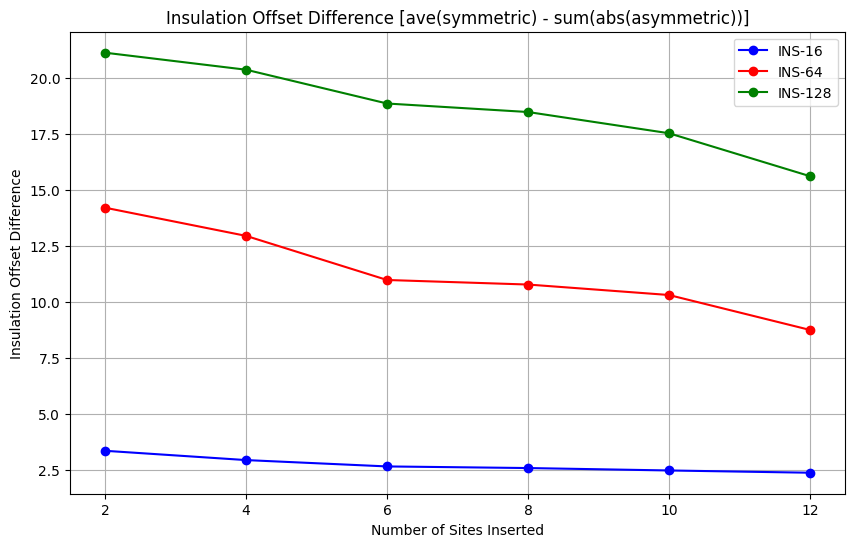

In [28]:
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(categories))], offset_INS16, marker='o', c="blue", label="INS-16")
plt.plot([i for i in range(len(categories))], offset_INS64, marker='o', c="red", label="INS-64")
plt.plot([i for i in range(len(categories))], offset_INS128, marker='o', c="green", label="INS-128")

plt.xlabel("Number of Sites Inserted")
plt.ylabel("Insulation Offset Difference")
plt.title("Insulation Offset Difference [ave(symmetric) - sum(abs(asymmetric))]")
plt.xticks(range(len(categories)), categories)

plt.legend()
plt.grid(True)
plt.show()

# comparing with medium sites

In [8]:
medium_df_m0 = h5_to_df("/scratch2/smaruj/insulation_offset/number_medium_m0/STATS_OUT.h5", ["SCD", "OFF-16", "OFF-64", "OFF-128"], ignore_keys=keys_to_ignore, average=False) 

In [10]:
medium_df = average_stat_over_targets(medium_df_m0, model_index=0, head_index=1, stat='OFF-64')

In [11]:
medium_df["OFF-16_m0"] = average_stat_over_targets(medium_df_m0, model_index=0, head_index=1, stat='OFF-16')["OFF-16_m0"]

In [12]:
medium_df["OFF-128_m0"] = average_stat_over_targets(medium_df_m0, model_index=0, head_index=1, stat='OFF-128')["OFF-128_m0"]

In [13]:
medium_summary_df = medium_df.groupby(["orientation"]).agg({"OFF-16_m0": "mean",
                                 "OFF-64_m0": "mean",
                                "OFF-128_m0": "mean"}).reset_index()

In [20]:
medium_summary_df = medium_summary_df.copy()
medium_summary_df["num_inserts"] = medium_summary_df["orientation"].apply(lambda x: len(x))

In [22]:
medium_summary_df["symmetric"] = medium_summary_df["orientation"].apply(check_same_ends)

In [24]:
medium_offset_INS16 = []
medium_offset_INS64 = []
medium_offset_INS128 = []

In [26]:
for num_ins in [2*x for x in range(1,7)]:

    symmetry_mean = medium_summary_df[(medium_summary_df["num_inserts"] == num_ins) & (medium_summary_df["symmetric"] == True)]["OFF-16_m0"].mean()
    assymetry_abssum = abs(medium_summary_df[(medium_summary_df["num_inserts"] == num_ins) & (medium_summary_df["symmetric"] == False)]["OFF-16_m0"]).sum()
    medium_offset_INS16.append(assymetry_abssum - symmetry_mean)

    symmetry_mean = medium_summary_df[(medium_summary_df["num_inserts"] == num_ins) & (medium_summary_df["symmetric"] == True)]["OFF-64_m0"].mean()
    assymetry_abssum = abs(medium_summary_df[(medium_summary_df["num_inserts"] == num_ins) & (medium_summary_df["symmetric"] == False)]["OFF-64_m0"]).sum()
    medium_offset_INS64.append(assymetry_abssum - symmetry_mean)

    symmetry_mean = medium_summary_df[(medium_summary_df["num_inserts"] == num_ins) & (medium_summary_df["symmetric"] == True)]["OFF-128_m0"].mean()
    assymetry_abssum = abs(medium_summary_df[(medium_summary_df["num_inserts"] == num_ins) & (medium_summary_df["symmetric"] == False)]["OFF-128_m0"]).sum()
    medium_offset_INS128.append(assymetry_abssum - symmetry_mean)

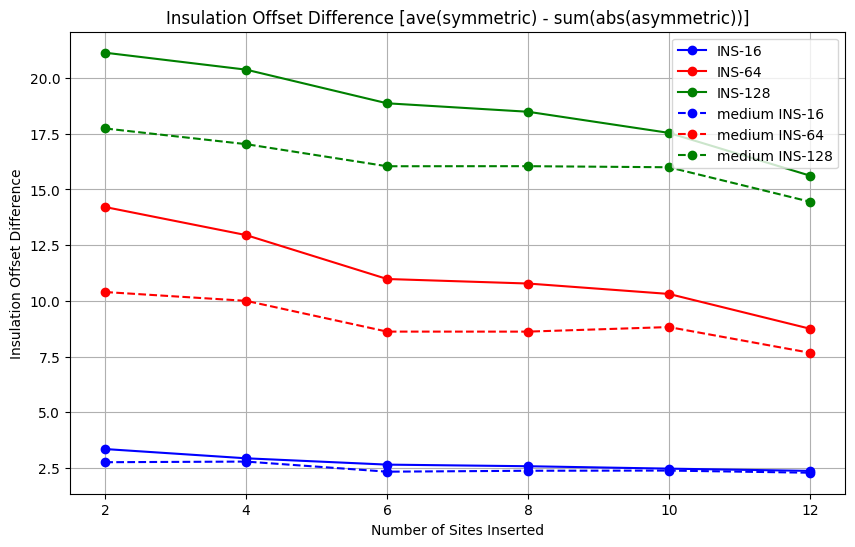

In [30]:
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(categories))], offset_INS16, marker='o', c="blue", label="INS-16")
plt.plot([i for i in range(len(categories))], offset_INS64, marker='o', c="red", label="INS-64")
plt.plot([i for i in range(len(categories))], offset_INS128, marker='o', c="green", label="INS-128")

plt.plot([i for i in range(len(categories))], medium_offset_INS16, "--", marker='o', c="blue", label="medium INS-16")
plt.plot([i for i in range(len(categories))], medium_offset_INS64, "--", marker='o', c="red", label="medium INS-64")
plt.plot([i for i in range(len(categories))], medium_offset_INS128, "--", marker='o', c="green", label="medium INS-128")

plt.xlabel("Number of Sites Inserted")
plt.ylabel("Insulation Offset Difference")
plt.title("Insulation Offset Difference [ave(symmetric) - sum(abs(asymmetric))]")
plt.xticks(range(len(categories)), categories)

plt.legend()
plt.grid(True)
plt.show()